In [1]:
import numpy as np # to work with arrays 
import pandas as pd # for data analysis and cleaning the data 
import matplotlib.pyplot as plt # for visulization 
%matplotlib inline
import seaborn as sns # for visulisation 
from sklearn.model_selection import train_test_split # for model selection of the data 

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# load the data
data = pd.read_csv("C:\\Users\\LDA\\Class Data\\Telecom Sample.csv")
data.head()

,Selected,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,...,datovr_Mean,datovr_Range,div_type,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Customer_ID
0,1,165.50,30.00,14.99,299.0,-97.50,5.666667,2,23,15.85,...,0.0,0.0,NaN,0.0,2.000000,5690.0,1048.68,1016.68,50.83,1030539
1,1,590.00,30.00,75.95,224.0,129.00,26.333333,8,13,83.12,...,0.0,0.0,NaN,0.0,21.000000,9367.0,1834.91,1783.93,89.20,1025498
2,1,80.75,29.99,0.99,101.0,-45.75,3.000000,7,3,18.28,...,0.0,0.0,NaN,0.0,2.333333,1516.0,425.29,395.30,30.41,1047583
3,1,82.75,10.00,0.00,155.0,85.25,0.000000,0,0,0.00,...,0.0,0.0,NaN,0.0,0.000000,4806.0,799.12,680.50,30.93,1036712
4,1,145.25,29.99,0.99,424.0,-145.25,3.000000,3,9,107.31,...,0.0,0.0,NaN,0.0,3.000000,9465.0,1250.97,1190.67,44.10,1016837


In [4]:
data.columns

Index(['Selected', 'mou_Mean', 'totmrc_Mean', 'rev_Range', 'mou_Range',
       'change_mou', 'drop_blk_Mean', 'drop_vce_Range', 'owylis_vce_Range',
       'mou_opkv_Range', 'months', 'totcalls', 'income', 'eqpdays',
       'custcare_Mean', 'callwait_Mean', 'iwylis_vce_Mean', 'callwait_Range',
       'ccrndmou_Range', 'adjqty', 'ovrrev_Mean', 'rev_Mean', 'ovrmou_Mean',
       'comp_vce_Mean', 'plcd_vce_Mean', 'avg3mou', 'avgmou', 'avg3qty',
       'avgqty', 'avg6mou', 'avg6qty', 'crclscod', 'asl_flag',
       'prizm_social_one', 'area', 'refurb_new', 'hnd_webcap', 'marital',
       'ethnic', 'age1', 'age2', 'models', 'hnd_price', 'actvsubs', 'uniqsubs',
       'forgntvl', 'dwlltype', 'dwllsize', 'mailordr', 'occu1', 'opk_dat_Mean',
       'mtrcycle', 'numbcars', 'retdays', 'truck', 'wrkwoman', 'roam_Mean',
       'recv_sms_Mean', 'blck_dat_Mean', 'mou_pead_Mean', 'churn', 'solflag',
       'proptype', 'mailresp', 'cartype', 'car_buy', 'children', 'csa',
       'da_Mean', 'da_Range', 'da

# feature selection 

Selecting a features after analysing all the features from data. Selecting the main features which really impacting on customers churn based on the previous analysis . which ever the features are getting higly impacting 

In [5]:
# features which ar eimpacting to the custumer churn 
df = data[["mou_Mean","totmrc_Mean","rev_Range","mou_Range","change_mou","months", "eqpdays","rev_Mean","actvsubs",
           "uniqsubs","totrev", "avgrev","forgntvl","age1","car_buy","hnd_price","drop_vce_Range","mou_opkv_Range",
           "custcare_Mean","comp_vce_Mean","da_Mean","da_Range","drop_vce_Mean","churn"]]

In [6]:
df.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,months,eqpdays,rev_Mean,actvsubs,uniqsubs,...,car_buy,hnd_price,drop_vce_Range,mou_opkv_Range,custcare_Mean,comp_vce_Mean,da_Mean,da_Range,drop_vce_Mean,churn
0,165.50,30.00,14.99,299.0,-97.50,21,633,34.5350,1,1,...,New,149.98999,2,15.85,0.000000,43.333333,0.7425,1.98,2.000000,1
1,590.00,30.00,75.95,224.0,129.00,22,178,118.6375,1,1,...,New,29.98999,8,83.12,0.000000,304.333333,0.0000,0.00,21.000000,1
2,80.75,29.99,0.99,101.0,-45.75,16,474,30.2750,1,1,...,UNKNOWN,79.98999,7,18.28,0.333333,19.666667,0.2475,0.99,2.333333,1
3,82.75,10.00,0.00,155.0,85.25,23,332,10.0000,2,2,...,UNKNOWN,199.98999,0,0.00,0.000000,0.000000,0.0000,0.00,0.000000,1
4,145.25,29.99,0.99,424.0,-145.25,30,885,30.4850,1,1,...,UNKNOWN,29.98999,3,107.31,1.333333,23.666667,0.4950,0.99,3.000000,1


In [7]:
df.tail()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,months,eqpdays,rev_Mean,actvsubs,uniqsubs,...,car_buy,hnd_price,drop_vce_Range,mou_opkv_Range,custcare_Mean,comp_vce_Mean,da_Mean,da_Range,drop_vce_Mean,churn
26514,361.0,49.99,0.00,0.0,NaN,32,45,49.990000,1,1,...,UNKNOWN,NaN,2,18.42,0.000000,120.000000,0.0,0.0,4.333333,0
26515,NaN,NaN,NaN,NaN,NaN,30,147,NaN,2,2,...,NaN,149.98999,4,140.63,0.333333,155.666667,NaN,NaN,14.000000,0
26516,NaN,NaN,NaN,NaN,NaN,25,212,NaN,1,1,...,UNKNOWN,149.98999,4,99.26,1.666667,120.666667,NaN,NaN,2.333333,0
26517,724.0,70.00,3.25,77.0,-40.0,30,882,71.993333,1,1,...,UNKNOWN,29.98999,5,18.90,0.000000,216.333333,0.0,0.0,14.333333,0
26518,NaN,NaN,NaN,NaN,NaN,27,835,NaN,1,1,...,New,29.98999,0,1.02,0.000000,53.333333,NaN,NaN,3.000000,0


In [8]:
# shape of the data 
df.shape

(26519, 24)

In [9]:
# checking the data types 
df.dtypes

mou_Mean          float64
totmrc_Mean       float64
rev_Range         float64
mou_Range         float64
change_mou        float64
months              int64
eqpdays             int64
rev_Mean          float64
actvsubs            int64
uniqsubs            int64
totrev            float64
avgrev            float64
forgntvl          float64
age1              float64
car_buy            object
hnd_price         float64
drop_vce_Range      int64
mou_opkv_Range    float64
custcare_Mean     float64
comp_vce_Mean     float64
da_Mean           float64
da_Range          float64
drop_vce_Mean     float64
churn               int64
dtype: object

In [10]:
# checking the statisics 
df.describe()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,months,eqpdays,rev_Mean,actvsubs,uniqsubs,...,age1,hnd_price,drop_vce_Range,mou_opkv_Range,custcare_Mean,comp_vce_Mean,da_Mean,da_Range,drop_vce_Mean,churn
count,26439.000000,26439.000000,26439.000000,26439.000000,26344.000000,26519.000000,26519.000000,26439.000000,26519.000000,26519.000000,...,26062.000000,26263.000000,26519.000000,26519.000000,26519.000000,26519.000000,26439.000000,26439.000000,26519.000000,26519.000000
mean,528.308064,47.053792,44.151237,377.113733,-9.086228,18.699574,378.044082,59.021005,1.350617,1.525359,...,31.323152,105.222447,5.440552,114.574499,1.867366,111.951343,0.888347,1.621467,6.045515,0.241035
std,535.562911,23.782202,115.727428,504.437118,316.590246,9.768509,254.902709,50.190082,0.629550,0.864243,...,22.065393,61.428417,8.204339,172.421010,5.124986,120.360833,2.188675,2.934030,8.795621,0.427719
min,0.000000,-1.422500,0.000000,0.000000,-3406.500000,6.000000,-5.000000,-2.520000,0.000000,1.000000,...,0.000000,9.989998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159.000000,30.000000,1.980000,114.000000,-82.750000,11.000000,202.000000,33.700000,1.000000,1.000000,...,0.000000,59.989990,1.000000,15.835000,0.000000,30.666667,0.000000,0.000000,0.666667,0.000000
50%,368.750000,44.990000,15.480000,244.000000,-4.500000,16.000000,326.000000,48.635000,1.000000,1.000000,...,36.000000,99.989990,3.000000,55.730000,0.000000,78.333333,0.247500,0.990000,3.000000,0.000000
75%,724.500000,59.990000,57.305000,478.000000,66.250000,24.000000,515.000000,71.181250,2.000000,2.000000,...,48.000000,149.989990,7.000000,138.570000,1.666667,154.333333,0.990000,1.980000,7.666667,0.000000
max,12206.750000,359.930000,13740.540000,43050.000000,31219.250000,61.000000,1813.000000,3843.262500,7.000000,13.000000,...,96.000000,499.989990,229.000000,2791.130000,327.333333,1812.666667,72.765000,57.420000,148.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mou_Mean        26439 non-null  float64
 1   totmrc_Mean     26439 non-null  float64
 2   rev_Range       26439 non-null  float64
 3   mou_Range       26439 non-null  float64
 4   change_mou      26344 non-null  float64
 5   months          26519 non-null  int64  
 6   eqpdays         26519 non-null  int64  
 7   rev_Mean        26439 non-null  float64
 8   actvsubs        26519 non-null  int64  
 9   uniqsubs        26519 non-null  int64  
 10  totrev          26519 non-null  float64
 11  avgrev          26519 non-null  float64
 12  forgntvl        26062 non-null  float64
 13  age1            26062 non-null  float64
 14  car_buy         26062 non-null  object 
 15  hnd_price       26263 non-null  float64
 16  drop_vce_Range  26519 non-null  int64  
 17  mou_opkv_Range  26519 non-null 

In [12]:
# unique value of data 
df.nunique()

mou_Mean           6660
totmrc_Mean        3507
rev_Range          9530
mou_Range          1987
change_mou         4741
months               56
eqpdays            1334
rev_Mean          16233
actvsubs              8
uniqsubs             12
totrev            24415
avgrev             9608
forgntvl              2
age1                 40
car_buy               2
hnd_price            16
drop_vce_Range       95
mou_opkv_Range    15180
custcare_Mean       147
comp_vce_Mean      1740
da_Mean             111
da_Range             46
drop_vce_Mean       228
churn                 2
dtype: int64

In [13]:
# value counts of the data 
df.value_counts

<bound method DataFrame.value_counts of        mou_Mean  totmrc_Mean  rev_Range  mou_Range  change_mou  months  \
0        165.50        30.00      14.99      299.0      -97.50      21   
1        590.00        30.00      75.95      224.0      129.00      22   
2         80.75        29.99       0.99      101.0      -45.75      16   
3         82.75        10.00       0.00      155.0       85.25      23   
4        145.25        29.99       0.99      424.0     -145.25      30   
...         ...          ...        ...        ...         ...     ...   
26514    361.00        49.99       0.00        0.0         NaN      32   
26515       NaN          NaN        NaN        NaN         NaN      30   
26516       NaN          NaN        NaN        NaN         NaN      25   
26517    724.00        70.00       3.25       77.0      -40.00      30   
26518       NaN          NaN        NaN        NaN         NaN      27   

       eqpdays    rev_Mean  actvsubs  uniqsubs  ...  car_buy  hnd_price

# Univariate analysis

Analysing the single feature hw ot impacts to churn 

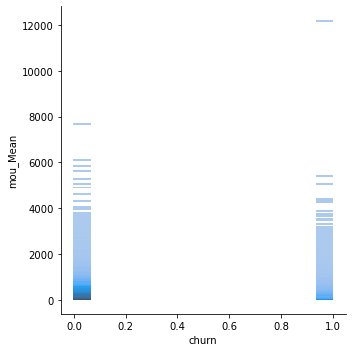

In [14]:
# analysing the Mean number of monthly minutes of use with churn
sns.displot(data=df,y="mou_Mean", x="churn")

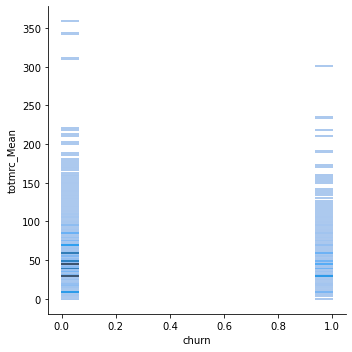

In [15]:
#Mean total monthly recurring charge analysis with churn 
sns.displot(data=df,x="churn",y="totmrc_Mean")

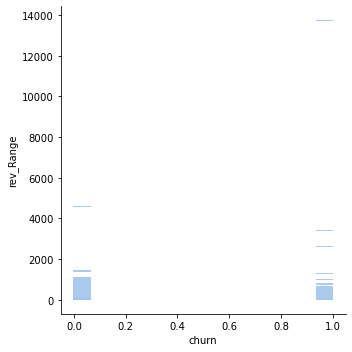

In [16]:
sns.displot(data=df,y="rev_Range",x="churn")

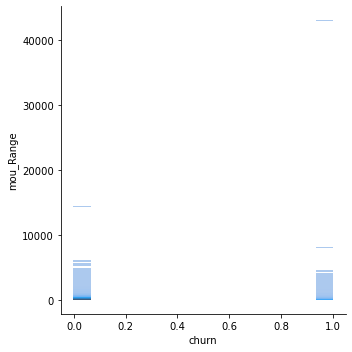

In [17]:
# Range of number of minutes of use analysis with churn 
sns.displot(data=df,x="churn",y="mou_Range")

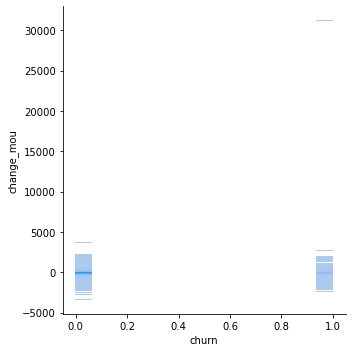

In [18]:
# Percentage change in monthly minutes of use vs previous three month average analysis  with churn
sns.displot(data=df,x="churn",y="change_mou")

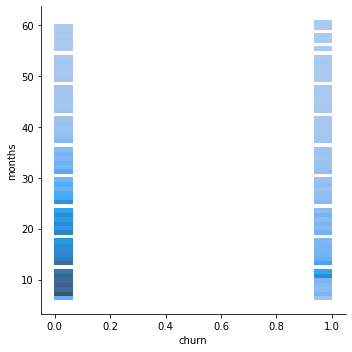

In [19]:
# analysis of Total number of months in service
sns.displot(data=df,x="churn",y="months")

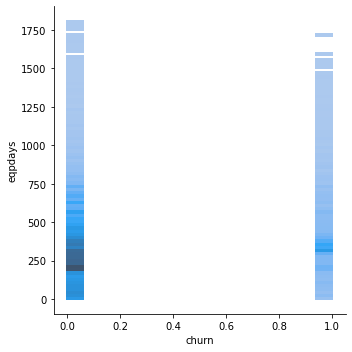

In [20]:
# checking Number of days (age) of current equipment with churn 
sns.displot(data=df,x="churn",y="eqpdays")

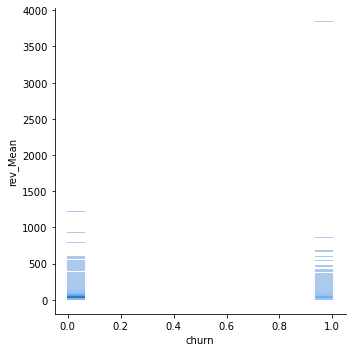

In [21]:
# checking the mean of Mean overage revenue of custmors with churn
sns.displot(data=df,x="churn",y="rev_Mean")

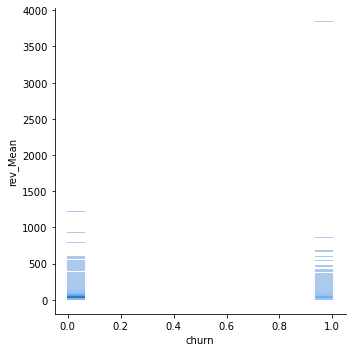

In [22]:
# checking Mean monthly revenue (charge amount) with churn
sns.displot(data=df,x="churn",y="rev_Mean")

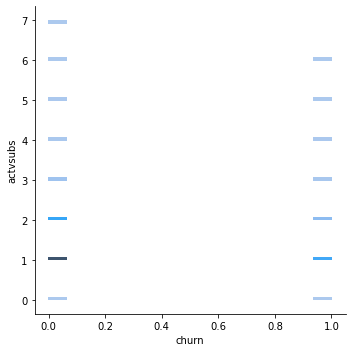

In [23]:
# checking the number of active subscribers in household with churn rate 
sns.displot(data=df,x="churn",y="actvsubs")

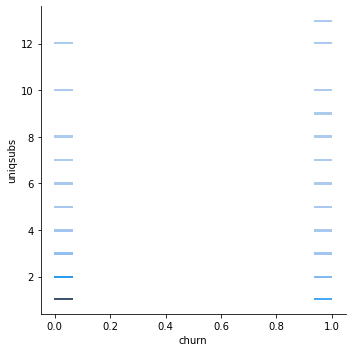

In [24]:
# Number of unique subscribers in the household with churn
sns.displot(data=df,x="churn",y="uniqsubs")

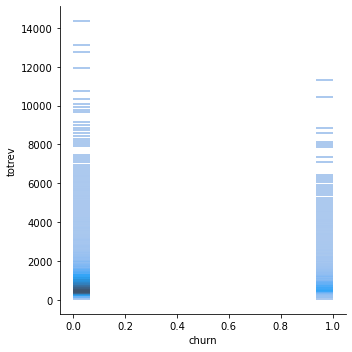

In [25]:
# analysing the data with total revenue 
sns.displot(data=df,x="churn",y='totrev')

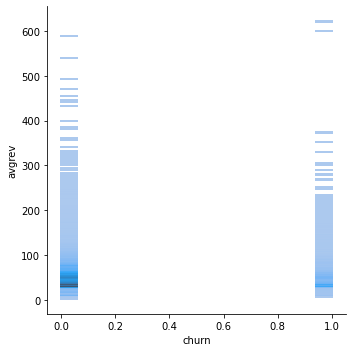

In [26]:
#analysing average monthly revenue over the life of the customer
sns.displot(data=df,x="churn",y="avgrev") 

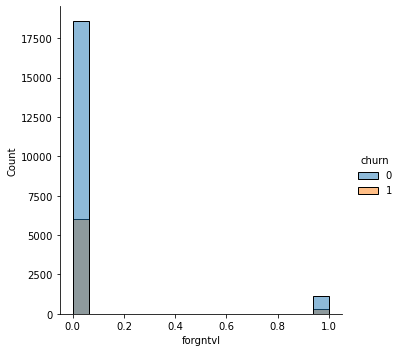

In [27]:
sns.displot(data=df,x="forgntvl",hue="churn")

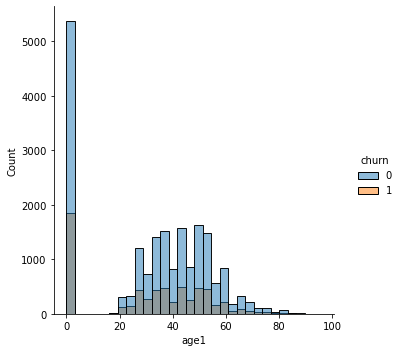

In [28]:
#Analysing age of first household member with churn rate 
sns.displot(data=df,x="age1",hue="churn")

car_buy  churn
New      0         8516
         1         2639
UNKNOWN  0        11238
         1         3669
Name: churn, dtype: int64

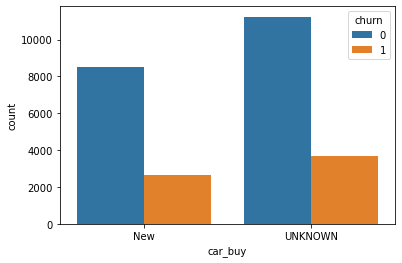

In [29]:
#checking churn rate based on new or used car buyer 
sns.countplot(data=df,x="car_buy",hue="churn")
df.groupby(["car_buy"])["churn"].value_counts()

hnd_price   churn
9.989998    0         719
            1         334
29.989990   0        3721
            1        1579
39.989990   0          93
            1          51
59.989990   0        1696
            1         545
79.989990   0        1942
            1         630
99.989990   0        1606
            1         457
129.989990  0        2886
            1         826
149.989990  0        4687
            1        1361
159.989990  0           1
179.989990  0          17
            1           7
199.989990  0        2387
            1         519
239.989990  0           7
            1           6
249.989990  0          70
            1           7
299.989990  0          16
            1           2
399.989990  0          51
            1          17
499.989990  0          21
            1           2
Name: churn, dtype: int64


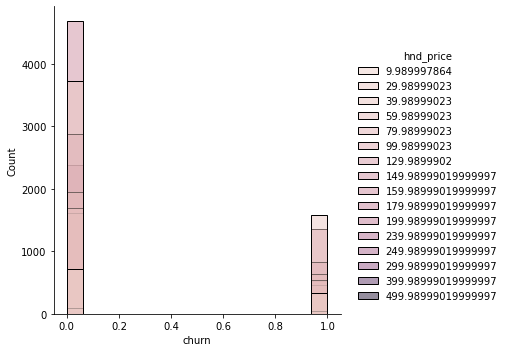

In [30]:
#checking  current handset price with churn 
sns.displot(data=df,x="churn",hue="hnd_price")
print(df.groupby(["hnd_price"])["churn"].value_counts()) # analysing the churn of handprice holders 

drop_vce_Range  churn
0               0        3553
                1        1268
1               0        2986
                1         919
2               0        2532
                         ... 
133             0           1
168             0           1
176             0           1
195             1           1
229             0           1
Name: churn, Length: 164, dtype: int64


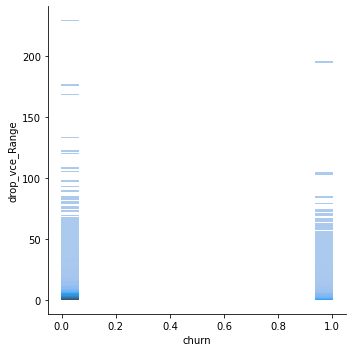

In [31]:
print(df.groupby(["drop_vce_Range"])["churn"].value_counts())
sns.displot(data=df,x="churn",y="drop_vce_Range") #Range of number of dropped (failed) voice calls with churn 

0.00      2240
0.52        13
0.65         9
1.47         9
0.35         9
          ... 
176.20       1
172.64       1
530.81       1
95.24        1
120.02       1
Name: mou_opkv_Range, Length: 15180, dtype: int64
mou_opkv_Range  churn
0.00            0        1541
                1         699
0.02            0           1
0.03            0           5
                1           2
                         ... 
2048.28         0           1
2094.47         0           1
2268.14         0           1
2688.75         0           1
2791.13         0           1
Name: churn, Length: 17636, dtype: int64


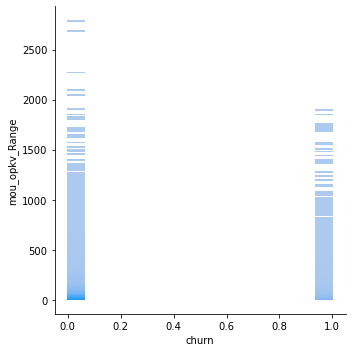

In [32]:
print(df["mou_opkv_Range"].value_counts())
print(df.groupby(["mou_opkv_Range"])["churn"].value_counts())
sns.displot(data=df,x='churn',y="mou_opkv_Range") # analysing Range of unrounded minutes of use of off-peak voice calls with churn

0.000000     14420
0.333333      1990
0.666667      1364
1.000000       952
1.333333       845
             ...  
68.333333        1
29.000000        1
54.000000        1
40.333333        1
31.000000        1
Name: custcare_Mean, Length: 147, dtype: int64
custcare_Mean  churn
0.000000       0        10680
               1         3740
0.333333       0         1486
               1          504
0.666667       0         1061
                        ...  
68.333333      1            1
98.666667      0            1
108.333333     0            1
273.000000     0            1
327.333333     0            1
Name: churn, Length: 231, dtype: int64


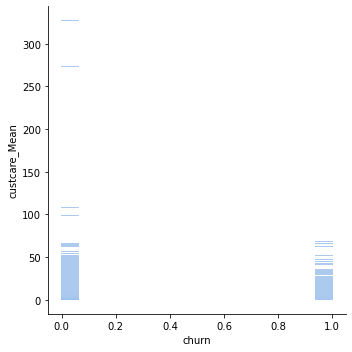

In [33]:
print(df["custcare_Mean"].value_counts())
sns.displot(data=df,x="churn",y="custcare_Mean") # checking Mean number of customer care calls with churn
print(df.groupby(["custcare_Mean"])["churn"].value_counts()) # values grouby with churn 

0.000000       2018
0.666667         80
0.333333         72
31.666667        70
25.000000        70
               ... 
687.333333        1
684.666667        1
330.000000        1
1313.000000       1
549.333333        1
Name: comp_vce_Mean, Length: 1740, dtype: int64


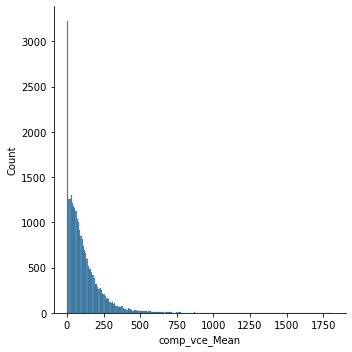

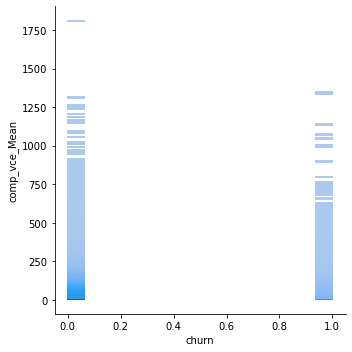

In [34]:
# checking Mean number of completed voice calls 
print(df["comp_vce_Mean"].value_counts()) # value counts of Mean number of completed voice calls
sns.displot(data=df,x="comp_vce_Mean") # plotig Mean number of completed voice calls
sns.displot(data=df,x="churn",y="comp_vce_Mean") # analysing with churn 

0.0000     12760
0.2475      3476
0.4950      2005
0.7425      1436
0.9900      1175
           ...  
17.5725        1
19.5525        1
45.0450        1
62.1225        1
18.8100        1
Name: da_Mean, Length: 111, dtype: int64


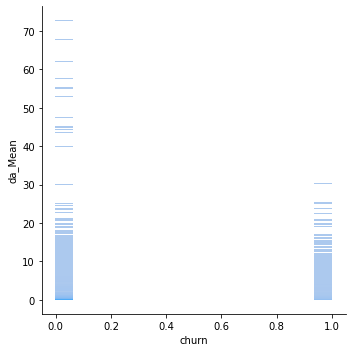

In [35]:
# Mean number of directory assisted calls
print(df["da_Mean"].value_counts())
sns.displot(data=df,x='churn',y="da_Mean") # Mean number of directory assisted calls with churn 

0.00     12817
0.99      5031
1.98      2966
2.97      1797
3.96      1128
4.95       745
5.94       531
6.93       353
7.92       261
8.91       175
9.90       130
10.89       87
11.88       81
12.87       64
13.86       47
14.85       45
15.84       32
16.83       31
17.82       22
18.81       17
20.79       10
22.77       10
21.78        8
23.76        7
19.80        5
26.73        4
25.74        4
28.71        4
24.75        3
32.67        3
50.49        3
29.70        3
34.65        2
31.68        1
38.61        1
56.43        1
35.64        1
41.58        1
40.59        1
57.42        1
30.69        1
52.47        1
27.72        1
43.56        1
33.66        1
45.54        1
Name: da_Range, dtype: int64
da_Range  churn
0.00      0        9645
          1        3172
0.99      0        3885
          1        1146
1.98      0        2255
                   ... 
50.49     0           2
          1           1
52.47     0           1
56.43     0           1
57.42     0           1
N

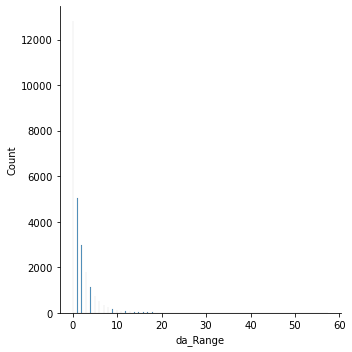

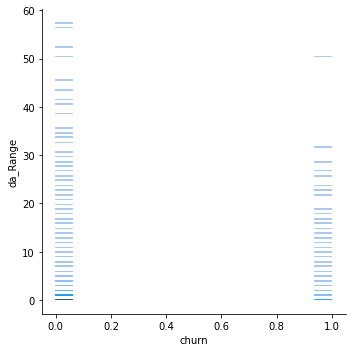

In [36]:
# Range of number of directory assisted calls
print(df["da_Range"].value_counts()) # Range of number of directory assisted calls value-counts
print(df.groupby(["da_Range"])["churn"].value_counts()) # groupby with value_counts
sns.displot(data=df,x='da_Range') # ploting 
sns.displot(data=df,x="churn",y="da_Range") 

0.000000      3986
0.333333      1332
0.666667      1321
1.000000      1188
1.333333      1180
              ... 
62.666667        1
72.000000        1
108.666667       1
131.333333       1
111.666667       1
Name: drop_vce_Mean, Length: 228, dtype: int64
drop_vce_Mean  churn
0.000000       0        2888
               1        1098
0.333333       0        1006
               1         326
0.666667       0         997
                        ... 
126.333333     0           1
131.333333     0           1
133.333333     0           1
142.333333     0           1
148.000000     1           1
Name: churn, Length: 379, dtype: int64


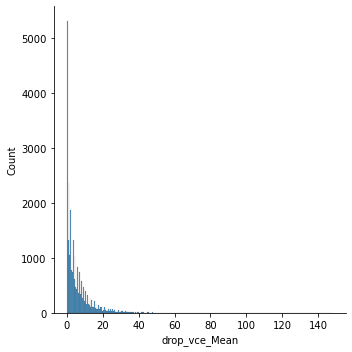

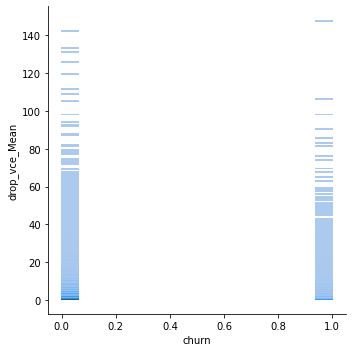

In [37]:
# checking Mean number of dropped (failed) voice calls with groupby value_counts and with churn rate 
print(df["drop_vce_Mean"].value_counts())
print(df.groupby(["drop_vce_Mean"])["churn"].value_counts())
sns.displot(data=df,x="drop_vce_Mean")
sns.displot(data=df,x="churn",y='drop_vce_Mean')

# Bivariate analysis  

Analysing and understanding the 2 features of the data 

mou_Mean  totmrc_Mean
0.00      10.0000        44
          5.0000         35
          29.9900        22
          0.0000         20
          39.9900        16
                         ..
5635.75   341.9250        1
5863.25   202.0050        1
6103.75   200.1525        1
7667.75   155.1500        1
12206.75  30.0000         1
Name: totmrc_Mean, Length: 22099, dtype: int64


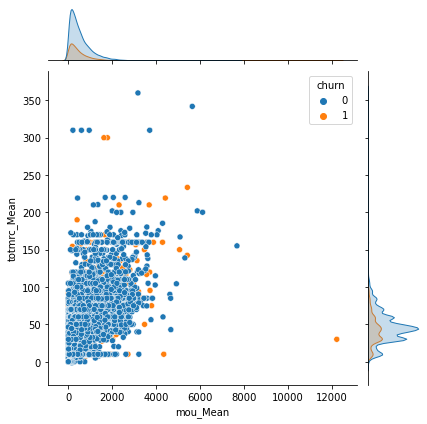

In [38]:
sns.jointplot(data=df,x="mou_Mean",y="totmrc_Mean",hue="churn") #checking the realtionship b/w Mean number of monthly 
# minutes of use with Mean total monthly recurring charge

print(df.groupby(["mou_Mean"])["totmrc_Mean"].value_counts())

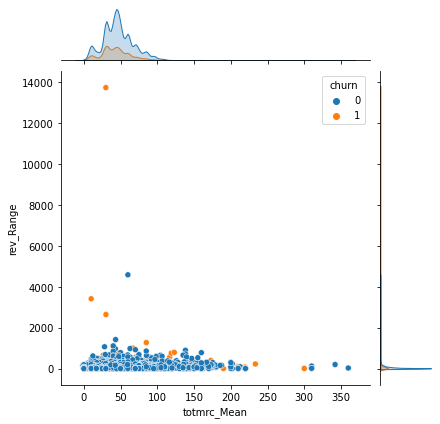

In [39]:
# Analysing Mean total monthly recurring charge and Range of revenue (charge amount) with churn
sns.jointplot(data=df,x="totmrc_Mean",y="rev_Range",hue="churn")

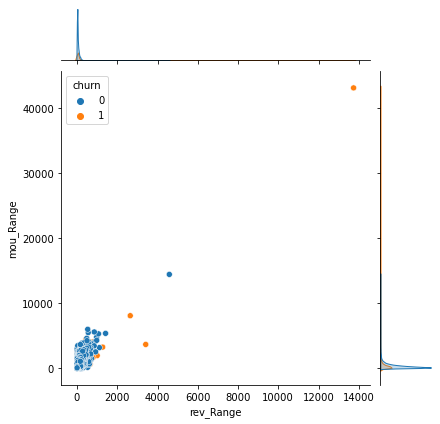

In [40]:
# Range of revenue (charge amount) with Range of number of minutes of use
sns.jointplot(data=df,x="rev_Range",y="mou_Range",hue="churn")

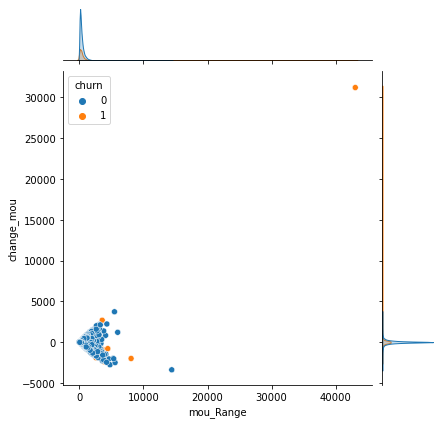

In [41]:
# Range of number of minutes of use and Percentage change in monthly minutes of use vs previous three month average with churn
sns.jointplot(data=df,x="mou_Range",y="change_mou",hue="churn")

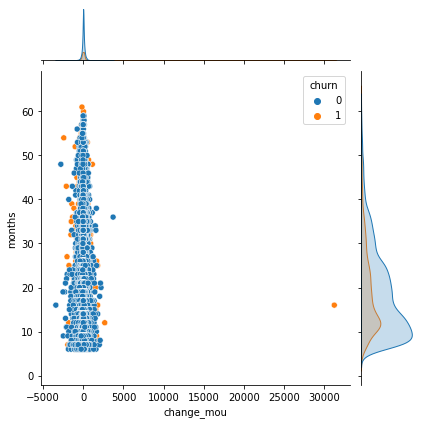

In [42]:
# analysing relation ship b/w Percentage change in monthly minutes of use vs previous three month average and Total number of months in service
sns.jointplot(data=df,x="change_mou",y="months",hue="churn")

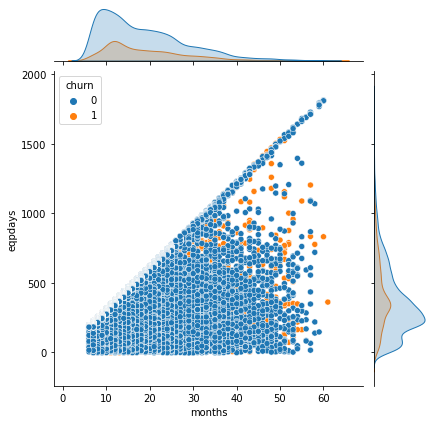

In [43]:
#Total number of months in service and Number of days (age) of current equipment
sns.jointplot(data=df,x="months",y="eqpdays",hue="churn")

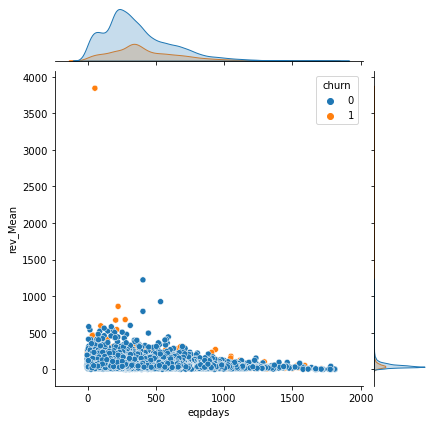

In [44]:
# Number of days (age) of current equipment and 
sns.jointplot(data=df,x="eqpdays",y="rev_Mean",hue="churn")


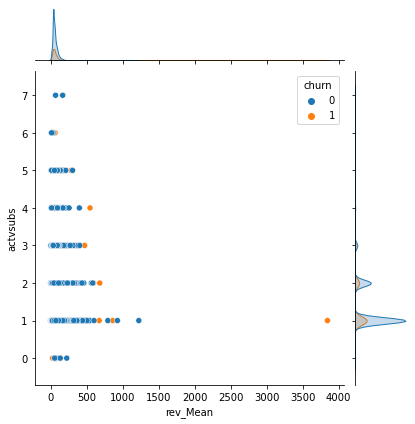

In [45]:
# checking the relation ship b/w Mean overage revenue and Number of active subscribers in household
sns.jointplot(data=df,x="rev_Mean",y="actvsubs",hue="churn")

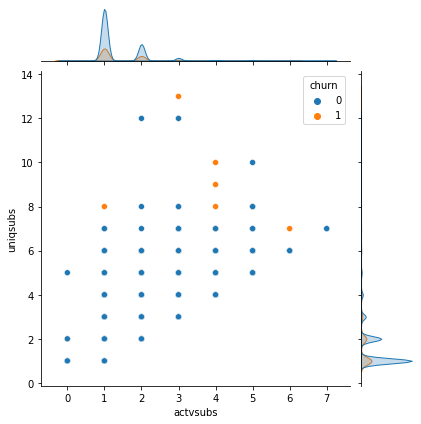

In [46]:
# checking the realtion ship b/w active subscribers and unique subscribers 
sns.jointplot(data=df,x="actvsubs",y="uniqsubs",hue="churn")

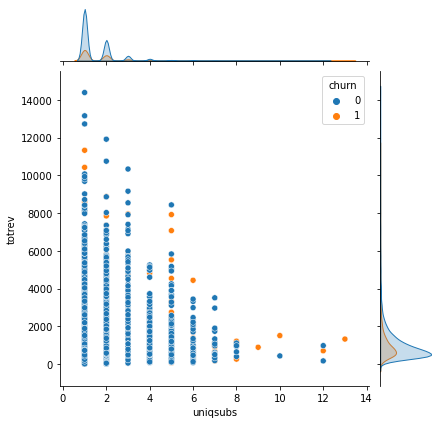

In [47]:
# checking the relation ship b/w active unique subscribers and total revenue 
sns.jointplot(data=df,x="uniqsubs",y="totrev",hue="churn")

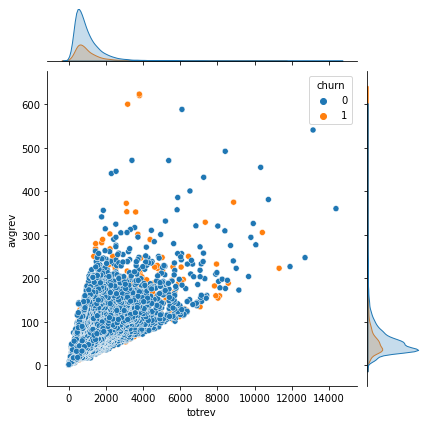

In [48]:
# comparing the total revenu and average revenu 
sns.jointplot(data=df,x="totrev",y="avgrev",hue="churn")

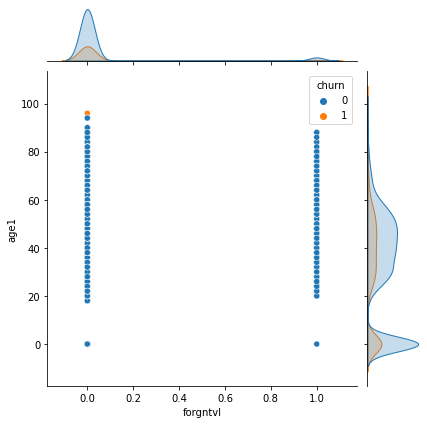

In [49]:
# checking the relation ship b/w forigen travel and age1 features 
sns.jointplot(data=df,x="forgntvl",y="age1",hue="churn")

<AxesSubplot:xlabel='car_buy', ylabel='age1'>

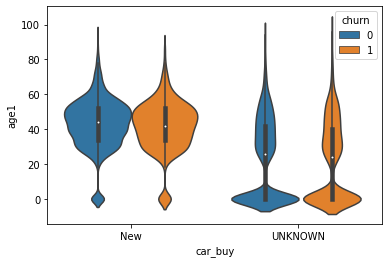

In [50]:
sns.violinplot(data=df,y="age1",x="car_buy",hue="churn")

<AxesSubplot:xlabel='car_buy', ylabel='hnd_price'>

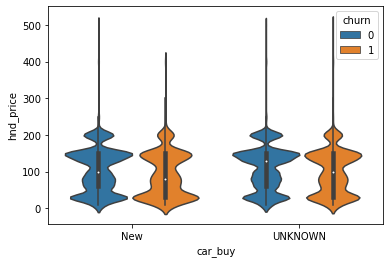

In [51]:
sns.violinplot(data=df,x="car_buy",y="hnd_price",hue="churn")


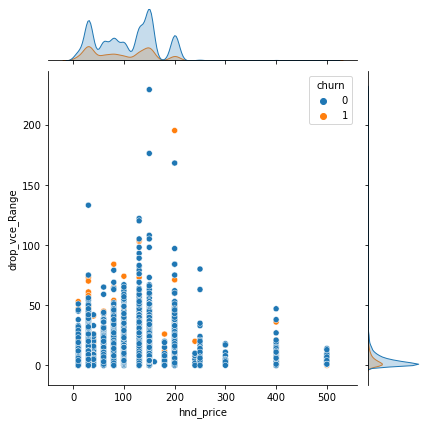

In [52]:
# checking handprice and Range of number of dropped (failed) voice calls features 
sns.jointplot(data=df,x="hnd_price",y="drop_vce_Range",hue="churn")

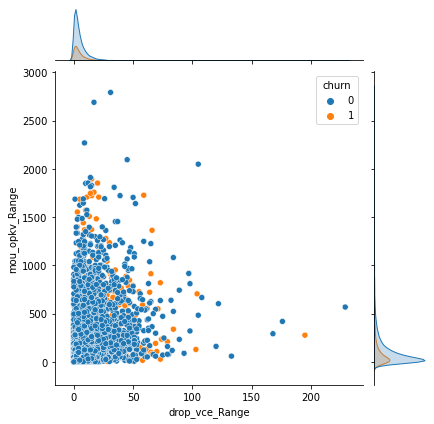

In [53]:
# checking realtionship b/w Range of number of dropped (failed) voice calls , and 
# Range of unrounded minutes of use of off-peak voice calls

sns.jointplot(data=df,x="drop_vce_Range",y="mou_opkv_Range",hue="churn")

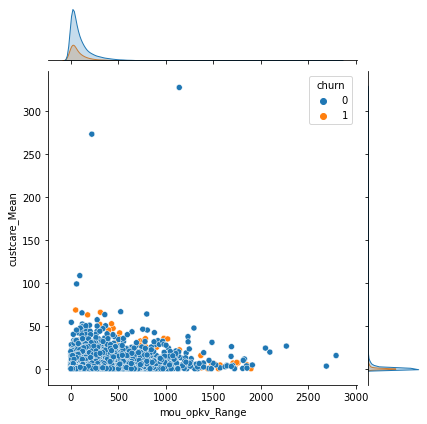

In [54]:
# Range of unrounded minutes of use of off-peak voice calls with Mean number of customer care calls 
sns.jointplot(data=df,x="mou_opkv_Range",y="custcare_Mean",hue="churn")

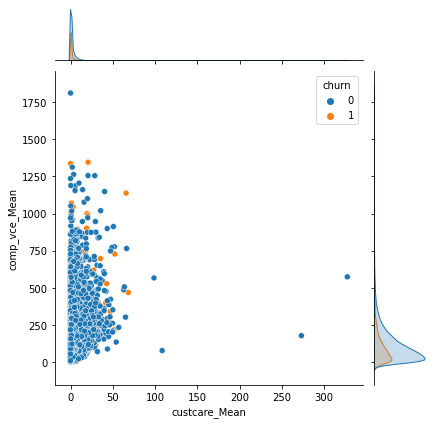

In [55]:
# checking the relationship b/w  mean number of customer care calls with Mean number of completed voice calls
sns.jointplot(data=df,x="custcare_Mean",y="comp_vce_Mean",hue="churn")

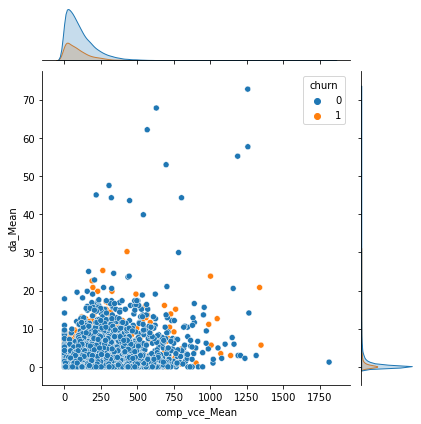

In [56]:
# Mean number of completed voice calls with Mean number of directory assisted calls
sns.jointplot(data=df,x="comp_vce_Mean",y="da_Mean",hue="churn")

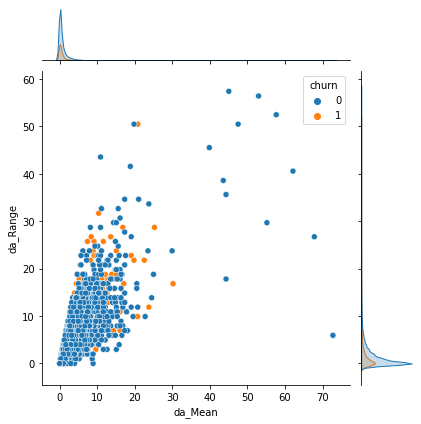

In [57]:
sns.jointplot(data=df,x="da_Mean",y="da_Range",hue="churn")

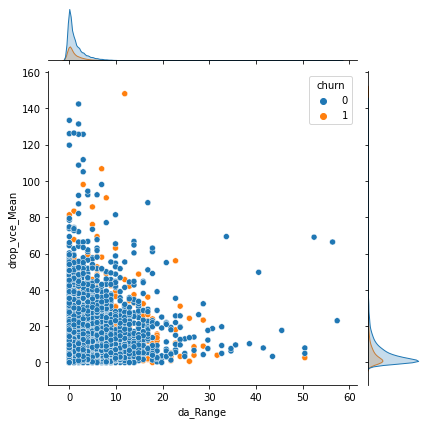

In [58]:
sns.jointplot(data=df,x="da_Range",y="drop_vce_Mean",hue="churn")

# Missing values 

handling missing values for features 

In [59]:
# checking the null values for all the features 
df.isnull().sum()

mou_Mean           80
totmrc_Mean        80
rev_Range          80
mou_Range          80
change_mou        175
months              0
eqpdays             0
rev_Mean           80
actvsubs            0
uniqsubs            0
totrev              0
avgrev              0
forgntvl          457
age1              457
car_buy           457
hnd_price         256
drop_vce_Range      0
mou_opkv_Range      0
custcare_Mean       0
comp_vce_Mean       0
da_Mean            80
da_Range           80
drop_vce_Mean       0
churn               0
dtype: int64

<AxesSubplot:>

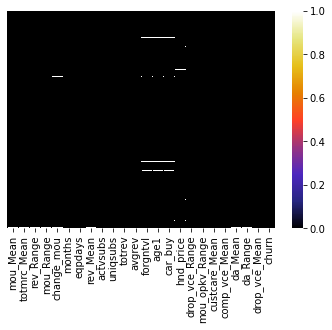

In [60]:
# visulizing the null values 
sns.heatmap(df.isnull(),yticklabels = False,cmap=plt.cm.CMRmap)

In [61]:
# checking the mean values 
df.mean()

mou_Mean           528.308064
totmrc_Mean         47.053792
rev_Range           44.151237
mou_Range          377.113733
change_mou          -9.086228
months              18.699574
eqpdays            378.044082
rev_Mean            59.021005
actvsubs             1.350617
uniqsubs             1.525359
totrev            1028.411626
avgrev              58.053824
forgntvl             0.056366
age1                31.323152
hnd_price          105.222447
drop_vce_Range       5.440552
mou_opkv_Range     114.574499
custcare_Mean        1.867366
comp_vce_Mean      111.951343
da_Mean              0.888347
da_Range             1.621467
drop_vce_Mean        6.045515
churn                0.241035
dtype: float64

In [62]:
# filling the null values with mean value for all the numeric features 
df = df.fillna(df.mean())
df.isnull().sum()

mou_Mean            0
totmrc_Mean         0
rev_Range           0
mou_Range           0
change_mou          0
months              0
eqpdays             0
rev_Mean            0
actvsubs            0
uniqsubs            0
totrev              0
avgrev              0
forgntvl            0
age1                0
car_buy           457
hnd_price           0
drop_vce_Range      0
mou_opkv_Range      0
custcare_Mean       0
comp_vce_Mean       0
da_Mean             0
da_Range            0
drop_vce_Mean       0
churn               0
dtype: int64

In [63]:
df["car_buy"].mode()

0    UNKNOWN
dtype: object

In [64]:
df = df.fillna({"car_buy":"UNKNOWN"})
df.isnull().sum()

mou_Mean          0
totmrc_Mean       0
rev_Range         0
mou_Range         0
change_mou        0
months            0
eqpdays           0
rev_Mean          0
actvsubs          0
uniqsubs          0
totrev            0
avgrev            0
forgntvl          0
age1              0
car_buy           0
hnd_price         0
drop_vce_Range    0
mou_opkv_Range    0
custcare_Mean     0
comp_vce_Mean     0
da_Mean           0
da_Range          0
drop_vce_Mean     0
churn             0
dtype: int64

# Handling outlayers 

checking the outlayers for every features 

count    26519.000000
mean       528.308064
std        534.754452
min          0.000000
25%        159.500000
50%        370.250000
75%        722.625000
max      12206.750000
Name: mou_Mean, dtype: float64


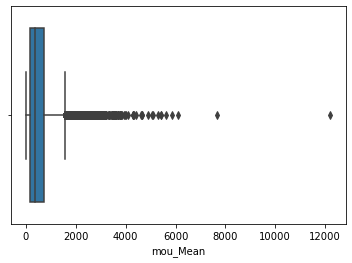

In [65]:
# Mean number of monthly minutes of use
sns.boxplot(data=df,x="mou_Mean")
print(df["mou_Mean"].describe())

count    26519.000000
mean        47.053792
std         23.746302
min         -1.422500
25%         30.000000
50%         44.990000
75%         59.990000
max        359.930000
Name: totmrc_Mean, dtype: float64


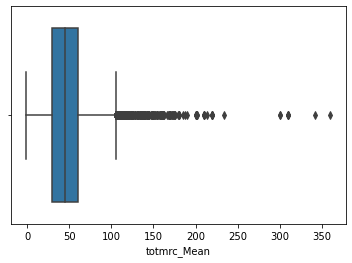

In [66]:
# Mean total monthly recurring charge
sns.boxplot(data=df,x="totmrc_Mean")
print(df["totmrc_Mean"].describe())

count    26519.000000
mean        44.151237
std        115.552732
min          0.000000
25%          1.980000
50%         15.610000
75%         57.035000
max      13740.540000
Name: rev_Range, dtype: float64


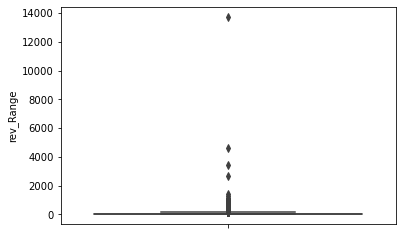

In [67]:
#Range of revenue (charge amount)
sns.boxplot(data=df,y="rev_Range")
print(df["rev_Range"].describe())

count    26519.000000
mean       377.113733
std        503.675646
min          0.000000
25%        115.000000
50%        245.000000
75%        477.000000
max      43050.000000
Name: mou_Range, dtype: float64

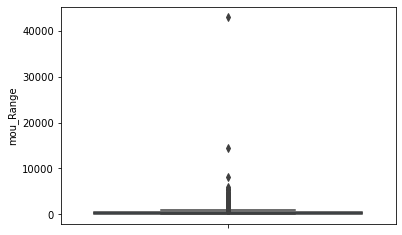

In [68]:
# Range of number of minutes of use
sns.boxplot(data=df,y="mou_Range")
df["mou_Range"].describe()

count    26519.000000
mean        -9.086228
std        315.543882
min      -3406.500000
25%        -81.750000
50%         -5.250000
75%         65.500000
max      31219.250000
Name: change_mou, dtype: float64


<AxesSubplot:ylabel='change_mou'>

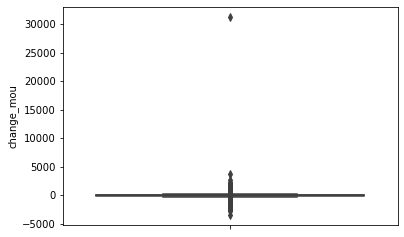

In [69]:
#Percentage change in monthly minutes of use vs previous three month average
print(df["change_mou"].describe())
sns.boxplot(data=df,y="change_mou")

count    26519.000000
mean        18.699574
std          9.768509
min          6.000000
25%         11.000000
50%         16.000000
75%         24.000000
max         61.000000
Name: months, dtype: float64


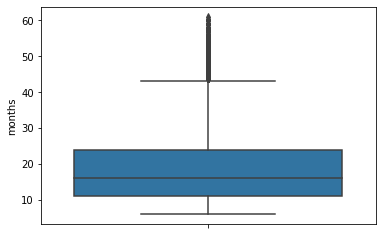

In [70]:
# Total number of months in service
sns.boxplot(data=df,y="months")
print(df["months"].describe())

count    26519.000000
mean       378.044082
std        254.902709
min         -5.000000
25%        202.000000
50%        326.000000
75%        515.000000
max       1813.000000
Name: eqpdays, dtype: float64


<AxesSubplot:ylabel='eqpdays'>

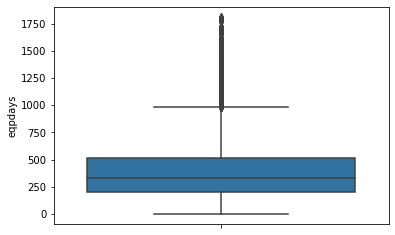

In [71]:
#Number of days (age) of current equipment
print(df["eqpdays"].describe())
sns.boxplot(data=df,y="eqpdays")

count    26519.000000
mean        59.021005
std         50.114318
min         -2.520000
25%         33.735000
50%         48.807500
75%         71.040000
max       3843.262500
Name: rev_Mean, dtype: float64


<AxesSubplot:ylabel='rev_Mean'>

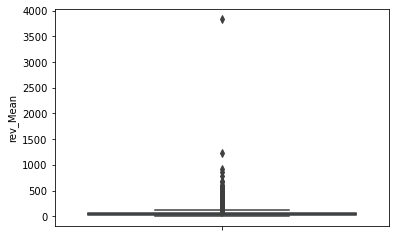

In [72]:
#Mean overage revenuesns
print(df["rev_Mean"].describe())
sns.boxplot(data=df,y="rev_Mean")

count    26519.000000
mean         1.350617
std          0.629550
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: actvsubs, dtype: float64


<AxesSubplot:ylabel='actvsubs'>

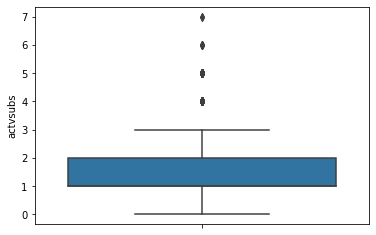

In [73]:
# Number of active subscribers in household
print(df["actvsubs"].describe())
sns.boxplot(data=df,y="actvsubs")

count    26519.000000
mean         1.525359
std          0.864243
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: uniqsubs, dtype: float64


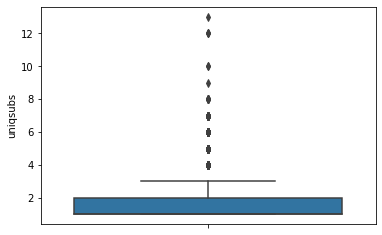

In [74]:
# unique subscribers 
sns.boxplot(data=df,y="uniqsubs")
print(df["uniqsubs"].describe())

count    26519.000000
mean      1028.411626
std        856.816008
min          3.650000
25%        506.185000
50%        789.990000
75%       1266.145000
max      14383.970000
Name: totrev, dtype: float64


<AxesSubplot:ylabel='totrev'>

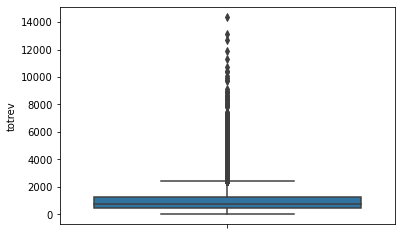

In [75]:
print(df["totrev"].describe())
sns.boxplot(data=df,y="totrev")

count    26519.000000
mean        58.053824
std         36.230476
min          0.540000
25%         35.380000
50%         50.030000
75%         69.625000
max        623.500000
Name: avgrev, dtype: float64


<AxesSubplot:ylabel='avgrev'>

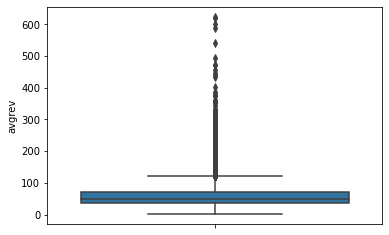

In [76]:
print(df["avgrev"].describe())
sns.boxplot(data=df,y='avgrev')

count    26519.000000
mean         0.056366
std          0.228635
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: forgntvl, dtype: float64


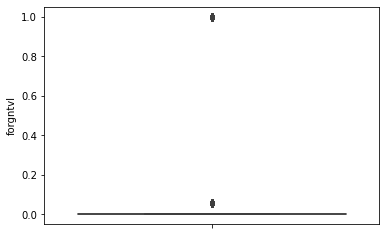

In [77]:
sns.boxplot(data=df,y="forgntvl")
print(df["forgntvl"].describe())

count    26519.000000
mean        31.323152
std         21.874434
min          0.000000
25%          0.000000
50%         36.000000
75%         48.000000
max         96.000000
Name: age1, dtype: float64

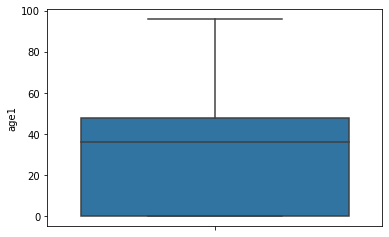

In [78]:
sns.boxplot(data=df,y="age1")
df["age1"].describe()

count    26519.000000
mean       105.222447
std         61.131188
min          9.989998
25%         59.989990
50%         99.989990
75%        149.989990
max        499.989990
Name: hnd_price, dtype: float64


<AxesSubplot:ylabel='hnd_price'>

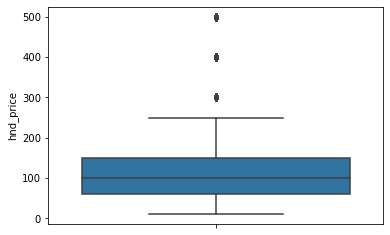

In [79]:
print(df["hnd_price"].describe())
sns.boxplot(data=df,y="hnd_price")

count    26519.000000
mean         5.440552
std          8.204339
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max        229.000000
Name: drop_vce_Range, dtype: float64


<AxesSubplot:ylabel='drop_vce_Range'>

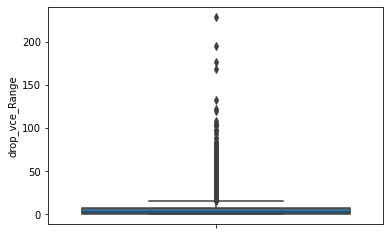

In [80]:
print(df["drop_vce_Range"].describe())
sns.boxplot(data=df,y="drop_vce_Range")

count    26519.000000
mean       114.574499
std        172.421010
min          0.000000
25%         15.835000
50%         55.730000
75%        138.570000
max       2791.130000
Name: mou_opkv_Range, dtype: float64


<AxesSubplot:ylabel='mou_opkv_Range'>

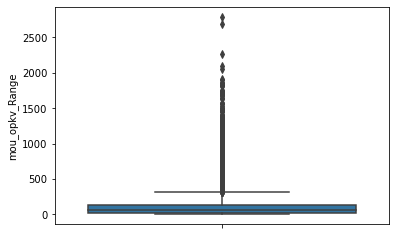

In [81]:
print(df["mou_opkv_Range"].describe())
sns.boxplot(data=df,y="mou_opkv_Range")

count    26519.000000
mean         1.867366
std          5.124986
min          0.000000
25%          0.000000
50%          0.000000
75%          1.666667
max        327.333333
Name: custcare_Mean, dtype: float64


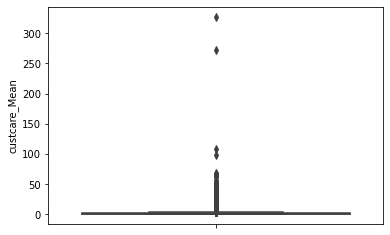

In [82]:
sns.boxplot(data=df,y="custcare_Mean")
print(df["custcare_Mean"].describe())

count    26519.000000
mean       111.951343
std        120.360833
min          0.000000
25%         30.666667
50%         78.333333
75%        154.333333
max       1812.666667
Name: comp_vce_Mean, dtype: float64


<AxesSubplot:ylabel='comp_vce_Mean'>

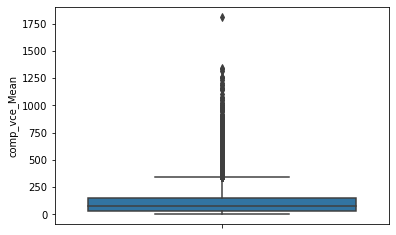

In [83]:
print(df["comp_vce_Mean"].describe())
sns.boxplot(data=df,y="comp_vce_Mean")

count    26519.000000
mean         0.888347
std          2.185371
min          0.000000
25%          0.000000
50%          0.247500
75%          0.990000
max         72.765000
Name: da_Mean, dtype: float64


<AxesSubplot:ylabel='da_Mean'>

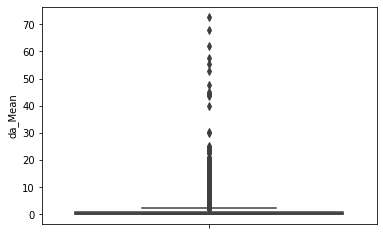

In [84]:
print(df["da_Mean"].describe())
sns.boxplot(data=df,y="da_Mean")

count    26519.000000
mean         1.621467
std          2.929601
min          0.000000
25%          0.000000
50%          0.990000
75%          1.980000
max         57.420000
Name: da_Range, dtype: float64


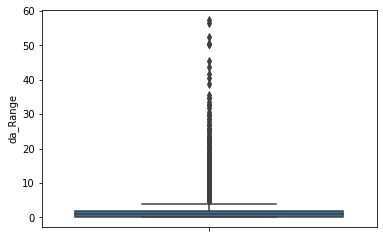

In [85]:
sns.boxplot(data=df,y="da_Range")
print(df["da_Range"].describe())

count    26519.000000
mean         6.045515
std          8.795621
min          0.000000
25%          0.666667
50%          3.000000
75%          7.666667
max        148.000000
Name: drop_vce_Mean, dtype: float64


<AxesSubplot:ylabel='drop_vce_Mean'>

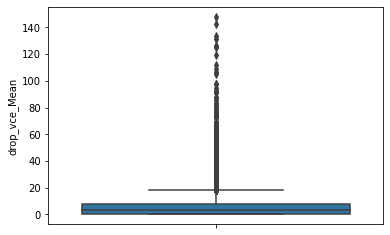

In [86]:
print(df["drop_vce_Mean"].describe())
sns.boxplot(data=df,y="drop_vce_Mean")

# Outlayers detection 

removing the outlayers from from data set 

In [87]:
#outlayers=[]
#def detect_outlayers(df): # creating a function which detect the outlayers 
 #   threshold = 3  # keeping an throshold value 3 which mean that the values which fall with in 3 std we will considar that it not an outlayers 
  #  mean = np.mean(df)
   # std = np.std(df)
    
    #for i in df: # applying for loop fpor each and value 
     #   z_score = (i - mean)/std
      #  if np.abs(z_score)> threshold: # calculating the values whic is away from 3 std 
       #     outlayers.append(i)
    #return outlayers


In [88]:
ddf = df.drop(["forgntvl","churn","car_buy"],axis=1)

# Outlayers detection by IQR

In [89]:
# checking the quantile 25th and 75 quantile 
Q1 = ddf.quantile(0.25)
Q3 = ddf.quantile(0.75)
print(Q1,Q3)

mou_Mean          159.500000
totmrc_Mean        30.000000
rev_Range           1.980000
mou_Range         115.000000
change_mou        -81.750000
months             11.000000
eqpdays           202.000000
rev_Mean           33.735000
actvsubs            1.000000
uniqsubs            1.000000
totrev            506.185000
avgrev             35.380000
age1                0.000000
hnd_price          59.989990
drop_vce_Range      1.000000
mou_opkv_Range     15.835000
custcare_Mean       0.000000
comp_vce_Mean      30.666667
da_Mean             0.000000
da_Range            0.000000
drop_vce_Mean       0.666667
Name: 0.25, dtype: float64 mou_Mean           722.625000
totmrc_Mean         59.990000
rev_Range           57.035000
mou_Range          477.000000
change_mou          65.500000
months              24.000000
eqpdays            515.000000
rev_Mean            71.040000
actvsubs             2.000000
uniqsubs             2.000000
totrev            1266.145000
avgrev              69.625000
age1

In [90]:
IQR = Q3-Q1 # calculating the inter quentile range by substracting q3 with q1 for all the features 
print(IQR)

mou_Mean          563.125000
totmrc_Mean        29.990000
rev_Range          55.055000
mou_Range         362.000000
change_mou        147.250000
months             13.000000
eqpdays           313.000000
rev_Mean           37.305000
actvsubs            1.000000
uniqsubs            1.000000
totrev            759.960000
avgrev             34.245000
age1               48.000000
hnd_price          90.000000
drop_vce_Range      6.000000
mou_opkv_Range    122.735000
custcare_Mean       1.666667
comp_vce_Mean     123.666667
da_Mean             0.990000
da_Range            1.980000
drop_vce_Mean       7.000000
dtype: float64


In [91]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit , upper_limit)

mou_Mean         -685.187500
totmrc_Mean       -14.985000
rev_Range         -80.602500
mou_Range        -428.000000
change_mou       -302.625000
months             -8.500000
eqpdays          -267.500000
rev_Mean          -22.222500
actvsubs           -0.500000
uniqsubs           -0.500000
totrev           -633.755000
avgrev            -15.987500
age1              -72.000000
hnd_price         -75.010010
drop_vce_Range     -8.000000
mou_opkv_Range   -168.267500
custcare_Mean      -2.500000
comp_vce_Mean    -154.833333
da_Mean            -1.485000
da_Range           -2.970000
drop_vce_Mean      -9.833333
dtype: float64 mou_Mean          1567.312500
totmrc_Mean        104.975000
rev_Range          139.617500
mou_Range         1020.000000
change_mou         286.375000
months              43.500000
eqpdays            984.500000
rev_Mean           126.997500
actvsubs             3.500000
uniqsubs             3.500000
totrev            2406.085000
avgrev             120.992500
age1            

In [92]:
ndf = ddf[(ddf > lower_limit)&(ddf < upper_limit)] # removing the outlayers from data set 
ndf.isnull().sum()

mou_Mean          1357
totmrc_Mean        519
rev_Range         2117
mou_Range         1833
change_mou        3511
months             584
eqpdays            724
rev_Mean          1542
actvsubs           307
uniqsubs           982
totrev            1519
avgrev            1428
age1                 0
hnd_price          109
drop_vce_Range    1953
mou_opkv_Range    2278
custcare_Mean     3529
comp_vce_Mean     1273
da_Mean           2838
da_Range          2700
drop_vce_Mean     1952
dtype: int64

In [93]:
ndf = ndf.fillna(ndf.mean()) # fiiling missing values based on an mean

In [94]:
# checking the null values after removing outlayers and filling missing values 
ndf.isnull().sum()

mou_Mean          0
totmrc_Mean       0
rev_Range         0
mou_Range         0
change_mou        0
months            0
eqpdays           0
rev_Mean          0
actvsubs          0
uniqsubs          0
totrev            0
avgrev            0
age1              0
hnd_price         0
drop_vce_Range    0
mou_opkv_Range    0
custcare_Mean     0
comp_vce_Mean     0
da_Mean           0
da_Range          0
drop_vce_Mean     0
dtype: int64

In [95]:
# merging the features which is not having outlayers 
new_df = pd.merge(ndf,df[["forgntvl","churn","car_buy"]],left_index=True,right_index=True)

<AxesSubplot:>

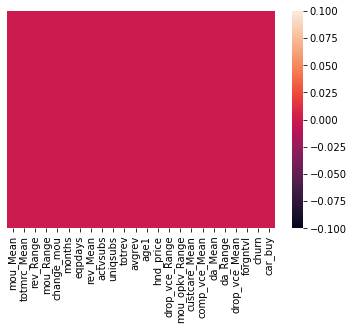

In [96]:
# visulizing the null values after reamoving null values and out layers 
sns.heatmap(new_df.isnull(),yticklabels =False)

In [97]:
# applying dummies for the catgorical features 
cleaned_data = pd.get_dummies(new_df,drop_first=True)

In [98]:
cleaned_data.shape

(26519, 24)

In [99]:
# checking the correlation 
cleaned_data.corr()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,months,eqpdays,rev_Mean,actvsubs,uniqsubs,...,drop_vce_Range,mou_opkv_Range,custcare_Mean,comp_vce_Mean,da_Mean,da_Range,drop_vce_Mean,forgntvl,churn,car_buy_UNKNOWN
mou_Mean,1.000000,0.469009,0.360472,0.558714,-0.018098,-0.104648,-0.282605,0.558650,-0.071751,-0.056543,...,0.359621,0.447218,0.259551,0.711883,0.227522,0.232221,0.497595,-0.055650,-0.046057,0.104300
totmrc_Mean,0.469009,1.000000,0.138745,0.331881,-0.002510,-0.090802,-0.226434,0.664140,-0.100324,-0.075410,...,0.229530,0.258468,0.157557,0.403593,0.174000,0.191210,0.306448,-0.044677,-0.058634,0.061962
rev_Range,0.360472,0.138745,1.000000,0.430012,-0.043139,-0.050547,-0.176564,0.465947,-0.068284,-0.051574,...,0.219605,0.246792,0.183097,0.328630,0.178064,0.182513,0.253298,-0.040897,0.020811,0.078143
mou_Range,0.558714,0.331881,0.430012,1.000000,-0.091867,-0.111965,-0.232850,0.451107,-0.059344,-0.043911,...,0.326024,0.452044,0.224255,0.468598,0.195469,0.210616,0.362036,-0.048764,-0.005999,0.091981
change_mou,-0.018098,-0.002510,-0.043139,-0.091867,1.000000,0.005381,-0.017702,-0.021359,-0.001778,-0.000837,...,-0.040670,-0.040433,-0.020867,-0.033233,-0.006606,-0.004144,-0.044417,0.016950,-0.033549,-0.012699
months,-0.104648,-0.090802,-0.050547,-0.111965,0.005381,1.000000,0.354183,-0.022323,0.034039,0.032056,...,-0.052909,-0.096910,-0.069488,-0.056549,-0.012200,-0.007070,-0.050989,0.038467,0.030527,-0.104651
eqpdays,-0.282605,-0.226434,-0.176564,-0.232850,-0.017702,0.354183,1.000000,-0.208009,0.027657,0.005131,...,-0.164298,-0.194840,-0.157362,-0.241353,-0.093656,-0.097781,-0.197780,0.028094,0.097415,-0.080959
rev_Mean,0.558650,0.664140,0.465947,0.451107,-0.021359,-0.022323,-0.208009,1.000000,-0.086196,-0.063430,...,0.290576,0.301490,0.180468,0.495114,0.247451,0.255806,0.373645,-0.048930,-0.024890,0.079023
actvsubs,-0.071751,-0.100324,-0.068284,-0.059344,-0.001778,0.034039,0.027657,-0.086196,1.000000,0.765438,...,-0.042530,-0.065760,-0.086345,-0.058672,-0.020753,-0.026904,-0.058077,0.038153,0.028579,-0.102139
uniqsubs,-0.056543,-0.075410,-0.051574,-0.043911,-0.000837,0.032056,0.005131,-0.063430,0.765438,1.000000,...,-0.033048,-0.055916,-0.073184,-0.045969,-0.007458,-0.012193,-0.045981,0.020301,0.044016,-0.080716


<AxesSubplot:>

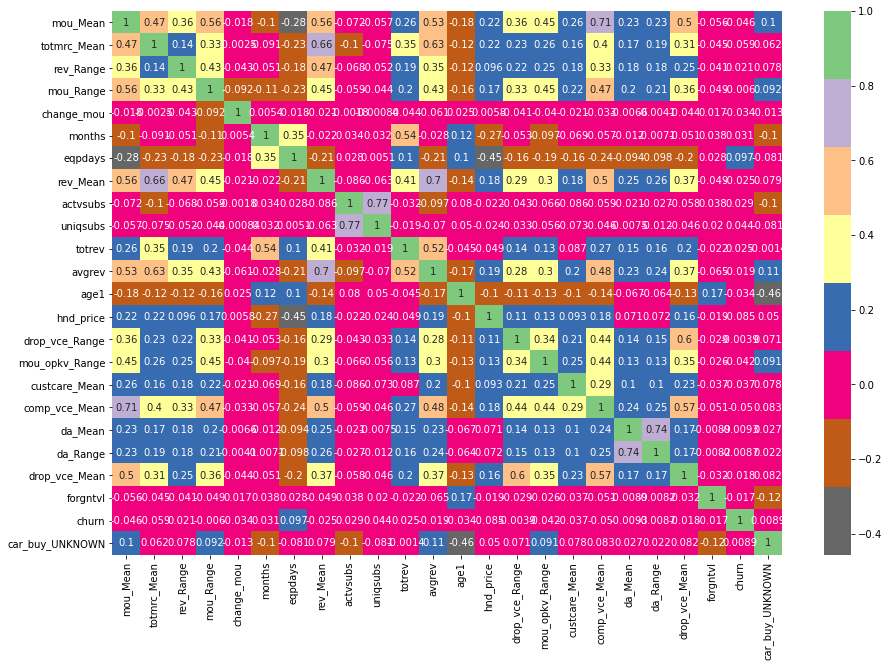

In [100]:
# visulizing corrleation
plt.figure(figsize=(15,10))
sns.heatmap(cleaned_data.corr(),annot=True,cmap = plt.cm.Accent_r)

In [101]:
# with the following function  we can select highly correlated features and it removes highly correlated features 
def correaltion(cleaned_data,threshold):
    col_corr = set() # set of all the corelated columns 
    corr_matrix = cleaned_data.corr() # corrlation columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # abss value of coeff values 
                colname = corr_matrix.columns[i] # getting the name of the column 
                col_corr.add(colname)
    return col_corr

In [102]:
corr_features = correaltion(df,0.85)
len(set(corr_features))

0

# Distributing data to dependent and independent 

In [103]:
X = cleaned_data.drop(["churn","rev_Mean","mou_Mean","da_Mean","da_Range","drop_vce_Mean"],axis=1)
Y = cleaned_data["churn"]

In [104]:
X.head()

,totmrc_Mean,rev_Range,mou_Range,change_mou,months,eqpdays,actvsubs,uniqsubs,totrev,avgrev,age1,hnd_price,drop_vce_Range,mou_opkv_Range,custcare_Mean,comp_vce_Mean,forgntvl,car_buy_UNKNOWN
0,30.00,14.99,299.0,-97.50,21.0,633.0,1.0,1.0,1048.68,50.83,52.0,149.98999,2.0,15.85,0.000000,43.333333,0.0,0
1,30.00,75.95,224.0,129.00,22.0,178.0,1.0,1.0,1834.91,89.20,60.0,29.98999,8.0,83.12,0.000000,304.333333,0.0,0
2,29.99,0.99,101.0,-45.75,16.0,474.0,1.0,1.0,425.29,30.41,20.0,79.98999,7.0,18.28,0.333333,19.666667,0.0,1
3,10.00,0.00,155.0,85.25,23.0,332.0,2.0,2.0,799.12,30.93,34.0,199.98999,0.0,0.00,0.000000,0.000000,0.0,1
4,29.99,0.99,424.0,-145.25,30.0,885.0,1.0,1.0,1250.97,44.10,0.0,29.98999,3.0,107.31,1.333333,23.666667,0.0,1


In [105]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: churn, dtype: int64

In [106]:
import statsmodels.api as sm # checking the p-values for features by applying stats  model technequ
model = sm.Logit(Y,X).fit() 

Optimization terminated successfully.
         Current function value: 0.542758
         Iterations 5


In [107]:
model.summary() ## checking the summary of the data  


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                26519
Model:                          Logit   Df Residuals:                    26501
Method:                           MLE   Df Model:                           17
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                 0.01722
Time:                        12:29:19   Log-Likelihood:                -14393.
converged:                       True   LL-Null:                       -14646.
Covariance Type:            nonrobust   LLR p-value:                 2.167e-96
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
totmrc_Mean        -0.0085      0.001     -8.692      0.000      -0.010      -0.007
rev_Range           0.0022      0.001      4.244      0.000       0.001       0.003
mou_Range           0.0002   8.35e-05      2.656      0.008    5.81e-05       0.000
change_mou         -0.0006      0.000     -4.426      0.000      -0.001      -0.000
months             -0.0207      0.002     -8.924      0.000      -0.025      -0.016
eqpdays             0.0004    7.3e-05      5.935      0.000       0.000       0.001
actvsubs           -0.1441      0.041     -3.520      0.000      -0.224      -0.064
uniqsubs            0.1462      0.036      4.013      0.000       0.075       0.218
totrev              0.0003   4.67e-05      7.468      0.000       0.000       0.000
avgrev             -0.0020      0.001     -1.975      0.048      -0.004   -1.58e-05
age1               -0.0082      0.001    -11.422      0.000      -0.010      -0.007
hnd_price          -0.0035      0.000    -13.310      0.000      -0.004      -0.003
drop_vce_Range      0.0148      0.005      3.166      0.002       0.006       0.024
mou_opkv_Range     -0.0012      0.000     -4.939      0.000      -0.002      -0.001
custcare_Mean      -0.0733      0.018     -4.104      0.000      -0.108      -0.038
comp_vce_Mean      -0.0012      0.000     -4.847      0.000      -0.002      -0.001
forgntvl           -0.1407      0.067     -2.085      0.037      -0.273      -0.008
car_buy_UNKNOWN    -0.1522      0.031     -4.884      0.000      -0.213      -0.091
===================================================================================
"""

# Model Selection

Spliting the data into training and test 

In [108]:
# importing necessayy library from sklearn 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21215, 18)
(5304, 18)
(21215,)
(5304,)


# Model implementation

let us implimenet different different model for data set 

In [110]:
from sklearn.linear_model import LogisticRegression

In [165]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_train,y_train)

0.7596511901956163

In [166]:
y_pred = lr_model.predict(x_test)
lr_model.score(x_test,y_pred)

1.0

In [113]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [167]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4010,    1],
       [1291,    2]], dtype=int64)

In [168]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4011
           1       0.67      0.00      0.00      1293

    accuracy                           0.76      5304
   macro avg       0.71      0.50      0.43      5304
weighted avg       0.73      0.76      0.65      5304



C:\Anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'True positive rate ')

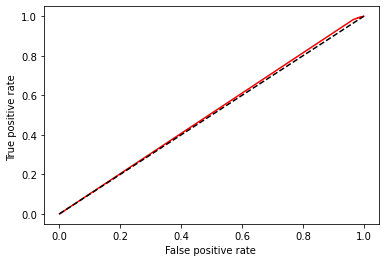

In [169]:
# visulizing the true positive and false positive rate with roc,roc_auc curve 
fpr,tpr,thresholds = roc_curve(Y,lr_model.predict_proba(X)[:,1])
auc = roc_auc_score(y_test, y_pred) # checking the true positive rate 
plt.plot(fpr,tpr,color="red",label="logit model ( area  = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False positive rate ")
plt.ylabel("True positive rate ")

# Handling imbalance data 

In [116]:
pip install imbalanced-learn

In [117]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\anaconda\lib\site-packages (1.0)Note: you may need to restart the kernel to use updated packages.



In [118]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "C:\Anaconda\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


In [120]:
from imblearn.combine import SMOTEENN

In [150]:
sm = SMOTEENN()
x_resampled,y_resampled = sm.fit_sample(X,Y)

In [154]:
xr_train,xr_test,yr_train,yr_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=100)

In [156]:
lr_model = LogisticRegression()
lr_model.fit(xr_train,yr_train)
lr_model.score(xr_train,yr_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7138793473593817

In [160]:
y_pred = lr_model.predict(xr_test)
lr_model.score(xr_test,y_pred)

1.0

In [161]:
cm = confusion_matrix(yr_test,y_pred)
cm

array([[ 299, 1198],
       [ 158, 3003]], dtype=int64)

In [162]:
# classification report
print(classification_report(yr_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.20      0.31      1497
           1       0.71      0.95      0.82      3161

    accuracy                           0.71      4658
   macro avg       0.68      0.57      0.56      4658
weighted avg       0.70      0.71      0.65      4658



# Decision tree algorithm model implementation 

In [122]:
from sklearn import tree # importing a library 
dt_model = tree.DecisionTreeClassifier(criterion = "gini",max_depth = 3)
dt_model.fit(x_train,y_train) # training the model with training data  
dt_model.score(x_train,y_train) # checking the accuracy of model

0.7610652839971718

In [123]:
# predicting the values for x_test/new data 
y_pred = dt_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
dt_model.score(x_test,y_pred) # checking the accuracy for test data set 

1.0

[Text(558.0, 237.82500000000002, 'X[5] <= 304.5\ngini = 0.365\nsamples = 21215\nvalue = [16116, 5099]'),
 Text(279.0, 169.875, 'X[4] <= 10.5\ngini = 0.286\nsamples = 9557\nvalue = [7903, 1654]'),
 Text(139.5, 101.92500000000001, 'X[0] <= 33.802\ngini = 0.235\nsamples = 4393\nvalue = [3796, 597]'),
 Text(69.75, 33.974999999999994, 'gini = 0.349\nsamples = 714\nvalue = [553, 161]'),
 Text(209.25, 33.974999999999994, 'gini = 0.209\nsamples = 3679\nvalue = [3243, 436]'),
 Text(418.5, 101.92500000000001, 'X[4] <= 11.5\ngini = 0.326\nsamples = 5164\nvalue = [4107, 1057]'),
 Text(348.75, 33.974999999999994, 'gini = 0.464\nsamples = 390\nvalue = [247, 143]'),
 Text(488.25, 33.974999999999994, 'gini = 0.31\nsamples = 4774\nvalue = [3860, 914]'),
 Text(837.0, 169.875, 'X[2] <= 1.5\ngini = 0.416\nsamples = 11658\nvalue = [8213, 3445]'),
 Text(697.5, 101.92500000000001, 'X[9] <= 43.065\ngini = 0.498\nsamples = 214\nvalue = [101, 113]'),
 Text(627.75, 33.974999999999994, 'gini = 0.491\nsamples = 13

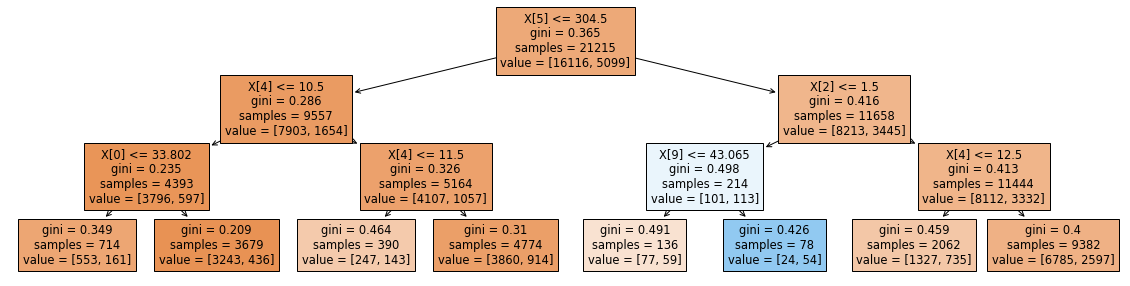

In [125]:
# ploting  DT chart 
plt.figure(figsize=(20,5))
tree.plot_tree(dt_model,filled=True)

In [126]:
# importing confusion metrics and classification report from sklearn library
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[3997,   14],
       [1281,   12]], dtype=int64)

In [127]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4011
           1       0.46      0.01      0.02      1293

    accuracy                           0.76      5304
   macro avg       0.61      0.50      0.44      5304
weighted avg       0.69      0.76      0.66      5304



Text(0, 0.5, 'True positive rate ')

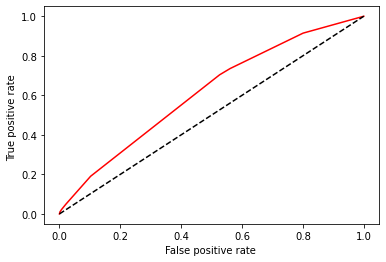

In [128]:
# visulizing the true positive and false positive rate with roc,roc_auc curve 
fpr,tpr,thresholds = roc_curve(Y,dt_model.predict_proba(X)[:,1])
auc = roc_auc_score(y_test, y_pred) # checking the true positive rate 
plt.plot(fpr,tpr,color="red",label="logit model ( area  = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False positive rate ")
plt.ylabel("True positive rate ")

In [170]:
# applying after fiting an imbalance data set 
from sklearn import tree # importing a library 
dt_model = tree.DecisionTreeClassifier(criterion = "gini",max_depth = 3)
dt_model.fit(xr_train,yr_train) # training the model with training data  
dt_model.score(xr_train,yr_train) # checking the accuracy of model

0.7432374409617861

In [173]:
# predicting the values for x_test/new data 
y_pred = dt_model.predict(xr_test)
dt_model.score(xr_test,y_pred) # checking the accuracy for test data set 

1.0

In [174]:
cm = confusion_matrix(yr_test,y_pred)
cm

array([[ 871,  626],
       [ 613, 2548]], dtype=int64)

In [175]:
print(classification_report(yr_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1497
           1       0.80      0.81      0.80      3161

    accuracy                           0.73      4658
   macro avg       0.69      0.69      0.69      4658
weighted avg       0.73      0.73      0.73      4658



# Random forest model implementation 

In [129]:
# importing necessary librarys 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 20)
rf_model.fit(x_train,y_train) # fiting data to model 
rf_model.score(x_train,y_train) # schecking accuracy 

0.9940136695734151

In [130]:
y_pred = rf_model.predict(x_test)
rf_model.score(x_test,y_pred)

1.0

In [131]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[3911,  100],
       [1218,   75]], dtype=int64)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4011
           1       0.43      0.06      0.10      1293

    accuracy                           0.75      5304
   macro avg       0.60      0.52      0.48      5304
weighted avg       0.68      0.75      0.67      5304



Text(0, 0.5, 'True positive rate ')

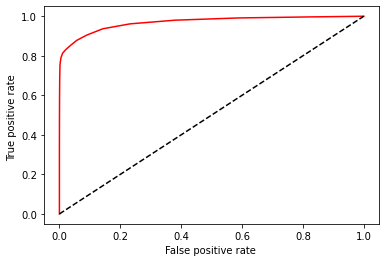

In [133]:
# visulizing the true positive and false positive rate with roc,roc_auc curve 
fpr,tpr,thresholds = roc_curve(Y,rf_model.predict_proba(X)[:,1])
auc = roc_auc_score(y_test, y_pred) # checking the true positive rate 
plt.plot(fpr,tpr,color="red",label="logit model ( area  = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False positive rate ")
plt.ylabel("True positive rate ")

For imbalance data set 

In [176]:
# importing necessary librarys 
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 20)
rf_model.fit(xr_train,yr_train) # fiting data to model 
rf_model.score(xr_train,yr_train) # schecking accuracy 

0.9993022756547875

In [177]:
y_pred = rf_model.predict(xr_test)
rf_model.score(xr_test,y_pred)

1.0

In [179]:
cm = confusion_matrix(yr_test,y_pred)
print(cm)
print(classification_report(yr_test,y_pred))

[[1076  421]
 [ 314 2847]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1497
           1       0.87      0.90      0.89      3161

    accuracy                           0.84      4658
   macro avg       0.82      0.81      0.82      4658
weighted avg       0.84      0.84      0.84      4658



# Support vector machine model implementation 

In [134]:
# importing necesary  librarys
from sklearn.svm import SVC
svm_model = SVC(gamma=5)
svm_model.fit(x_train,y_train)
svm_model.score(x_train,y_train)

1.0

In [135]:
y_pred = svm_model.predict(x_test)
svm_model.score(x_test,y_pred)

1.0

In [136]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[4011    0]
 [1293    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4011
           1       0.00      0.00      0.00      1293

    accuracy                           0.76      5304
   macro avg       0.38      0.50      0.43      5304
weighted avg       0.57      0.76      0.65      5304



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
# importing necesary  librarys
from sklearn.svm import SVC
svm_model = SVC(gamma=5)
svm_model.fit(xr_train,yr_train)
svm_model.score(xr_train,yr_train)

1.0

In [182]:
y_pred = svm_model.predict(xr_test)
svm_model.score(xr_test,y_pred)

1.0

In [183]:
cm = confusion_matrix(yr_test,y_pred)
print(cm)
print(classification_report(yr_test,y_pred))

[[   0 1497]
 [   0 3161]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1497
           1       0.68      1.00      0.81      3161

    accuracy                           0.68      4658
   macro avg       0.34      0.50      0.40      4658
weighted avg       0.46      0.68      0.55      4658



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive bayes algorithum implementation

In [138]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_model.score(x_train,y_train)

0.7366957341503653

In [139]:
y_pred = nb_model.predict(x_test)
nb_model.score(x_test,y_pred)

1.0

In [140]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[3753  258]
 [1161  132]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      4011
           1       0.34      0.10      0.16      1293

    accuracy                           0.73      5304
   macro avg       0.55      0.52      0.50      5304
weighted avg       0.66      0.73      0.67      5304



Text(0, 0.5, 'True positive rate ')

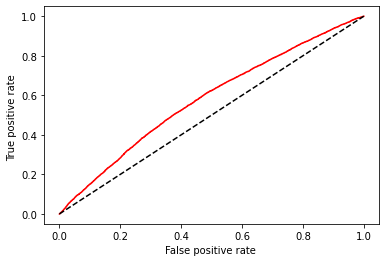

In [141]:
# visulizing the true positive and false positive rate with roc,roc_auc curve 
fpr,tpr,thresholds = roc_curve(Y,nb_model.predict_proba(X)[:,1])
auc = roc_auc_score(y_test, y_pred) # checking the true positive rate 
plt.plot(fpr,tpr,color="red",label="logit model ( area  = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False positive rate ")
plt.ylabel("True positive rate ")

In [185]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(xr_train,yr_train)
nb_model.score(xr_train,yr_train)

0.6794224989265779

In [186]:
y_pred = nb_model.predict(xr_test)
nb_model.score(xr_test,y_pred)

1.0

In [187]:
cm = confusion_matrix(yr_test,y_pred)
print(cm)
print(classification_report(yr_test,y_pred))

[[ 596  901]
 [ 582 2579]]
              precision    recall  f1-score   support

           0       0.51      0.40      0.45      1497
           1       0.74      0.82      0.78      3161

    accuracy                           0.68      4658
   macro avg       0.62      0.61      0.61      4658
weighted avg       0.67      0.68      0.67      4658



# KNN algorithum implementation 

In [142]:
from sklearn.preprocessing import StandardScaler # importing standerd scaler from sklearn library
scaler = StandardScaler()
scaler.fit(x_train) # fiting the data to scaler 
x_train = scaler.transform(x_train) # transferming the data to standerd scaler
x_test = scaler.transform(x_test)

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn_model = KNeighborsClassifier(n_neighbors = 10) 
knn_model.fit(x_train,y_train) # fiting the data to model
knn_model.score(x_train,y_train) # checking the accuracy 

0.768559981145416

In [145]:
y_pred = knn_model.predict(x_test) # predicting for x_test
knn_model.fit(x_test,y_pred) # fiting test data to the model
knn_model.score(x_test,y_pred)

0.9698340874811463

In [146]:
cm = confusion_matrix(y_test,y_pred) # confusion metrics 
cm

array([[3912,   99],
       [1229,   64]], dtype=int64)

C:\Anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'True positive rate ')

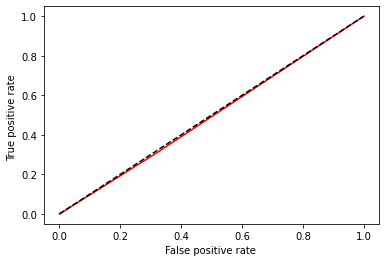

In [147]:
# visulizing the true positive and false positive rate with roc,roc_auc curve 
fpr,tpr,thresholds = roc_curve(Y,knn_model.predict_proba(X)[:,1])
auc = roc_auc_score(y_test, y_pred) # checking the true positive rate 
plt.plot(fpr,tpr,color="red",label="logit model ( area  = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False positive rate ")
plt.ylabel("True positive rate ")

In [188]:
from sklearn.preprocessing import StandardScaler # importing standerd scaler from sklearn library
scaler = StandardScaler()
scaler.fit(xr_train) # fiting the data to scaler 
xr_train = scaler.transform(xr_train) # transferming the data to standerd scaler
xr_test = scaler.transform(xr_test)

In [190]:
knn_model = KNeighborsClassifier(n_neighbors = 10) 
knn_model.fit(xr_train,yr_train) # fiting the data to model
knn_model.score(xr_train,yr_train) # checking the accuracy 

0.8086088449978531

In [196]:
y_pred = knn_model.predict(xr_test)
knn_model.score(xr_test,y_pred)

1.0

In [195]:
cm = confusion_matrix(yr_test,y_pred)
print(cm)
print(classification_report(yr_test,y_pred))

[[ 600  897]
 [ 222 2939]]
              precision    recall  f1-score   support

           0       0.73      0.40      0.52      1497
           1       0.77      0.93      0.84      3161

    accuracy                           0.76      4658
   macro avg       0.75      0.67      0.68      4658
weighted avg       0.75      0.76      0.74      4658



C:\Anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'True positive rate ')

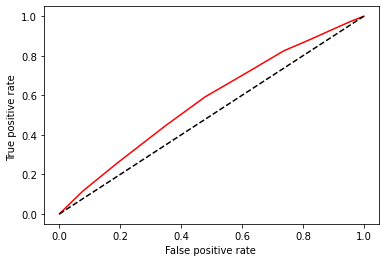

In [193]:
# visulizing the true positive and false positive rate with roc,roc_auc curve 
fpr,tpr,thresholds = roc_curve(Y,knn_model.predict_proba(X)[:,1])
auc = roc_auc_score(yr_test, y_pred) # checking the true positive rate 
plt.plot(fpr,tpr,color="red",label="logit model ( area  = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False positive rate ")
plt.ylabel("True positive rate ")